In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important;} *{font-family:'Consolas'; font-size:14;} </style>"))

# 회귀분석

관찰된 연속형 변수들에 대해 두 변수 사이의 모형을 구한 뒤 적합도를 측정해 내는 분석
    - 선형적인 상관성을 가진 변수들 사이의 인과관계를 증명
    - 원인이 되는 독립변수, 결과가 되는 종속변수
    - 시간에 따라 변화하는 데이터(시계열 데이터)나 어떤 영향, 가설적 실험, 인과 관계의 모델링 등 통계적 예측에 이용될 수 있음
    - 어떤 연관성을 가지고 있는 종속변수의 변동이나 분산을 설명하기 위하여 종속변수와 관계가 있는 독립변수들 중 각각의 독립변수가 설명력을 얼마나 가지고 있는가를 결정할 때 사용
    

#### 회귀분석의 전제사항
1. 선형성: 독립 변수의 변화에 따라 종속 변수도 일정 크기로 변함
2. 독립성: 오차와 독립 변수의 값이 관련이 없음
3. 등분산성: 독립 변수의 모든 값에 대해 오차들의 분산이 일정
4. 비상관성: 관측치의 오차들 사이에 상관관계가 없음
5. 정상성: 오차가 정규 분포를 따름

#### 피어슨 상관계수 (Perason Correlation Coefficient)
- 수치로 표시된 데이터 간의 상관관계를 확인하기 위해 사용
- 두 변수가 모두 연속형 자료일 때
- 두 변수간 선형적인 상관관계의 크기를 모수적(parametric)인 방법으로 나타낸 값


    귀무가설(H0): 상관계수가 0 (상관관계가 없음) 
    대립가설(H1): 상관계수가 0이 아님 (상관관계가 있음) 
    
    유의 확률(p-value)이 유의 수준(0.06)보다 작은 경우, 귀무가설을 기각

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
import seaborn as sns
iris = sns.load_dataset("iris")

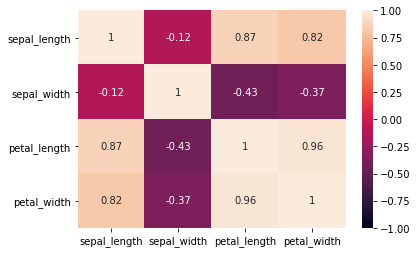

In [12]:
sns.heatmap(iris.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

In [10]:
iris.corr(method='pearson')

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [7]:
from scipy.stats.stats import pearsonr
pearsonr(iris.petal_length, iris.petal_width)
# Return: (피어슨 상관계수, 2-tailed p-value(유의확률))
# 유의확률이 0.05보다 작으므로 귀무가설을 기각, petal_length와 petal_width는 관계가 있음

(0.962865431402796, 4.6750039073285846e-86)

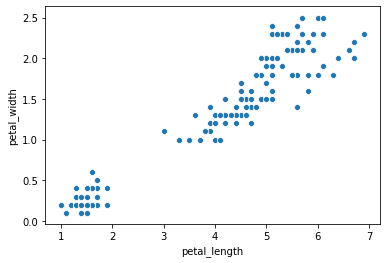

In [5]:
sns.scatterplot(iris.petal_length, iris.petal_width)

#### 스피어만 상관계수 (Spearman Correlation Coefficient)

In [13]:
iris.corr(method='spearman')

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.166778,0.881898,0.834289
sepal_width,-0.166778,1.000000,-0.309635,-0.289032
petal_length,0.881898,-0.309635,1.000000,0.937667
petal_width,0.834289,-0.289032,0.937667,1.000000


In [14]:
from scipy.stats.stats import spearmanr
spearmanr(iris.petal_length, iris.petal_width)

SpearmanrResult(correlation=0.9376668235763412, pvalue=8.156596854126675e-70)

In [15]:
import pandas as pd
redwine = pd.read_csv("winequality-red.csv", delimiter=';')

In [16]:
redwine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


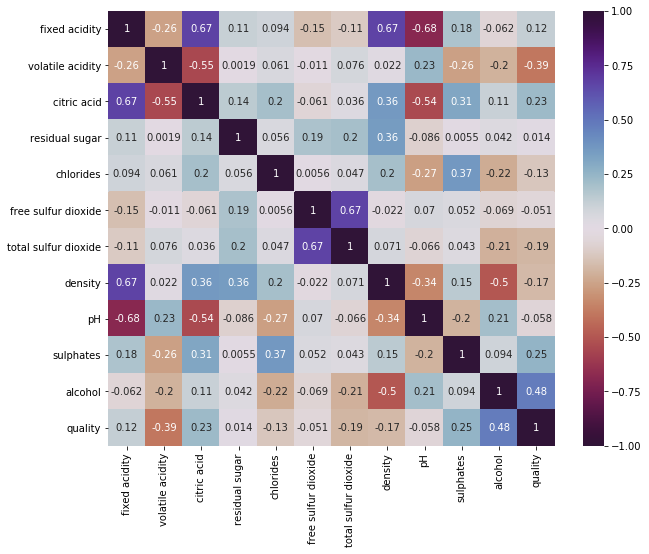

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(redwine.corr(), vmin=-1, vmax=1, annot=True,
           cmap='twilight_shifted_r')
plt.show()

## 단순 회귀 분석

### 선형방정식으로 회귀 모형 구하기

In [27]:
X = [32, 64, 96, 118, 126, 144, 152, 158]
Y = [17, 24, 62, 49, 52, 105, 130, 125]

In [28]:
import numpy as np

In [29]:
A = np.c_[X, np.ones(8)]
B = np.array(Y)

In [30]:
A

array([[ 32.,   1.],
       [ 64.,   1.],
       [ 96.,   1.],
       [118.,   1.],
       [126.,   1.],
       [144.,   1.],
       [152.,   1.],
       [158.,   1.]])

In [31]:
B

array([ 17,  24,  62,  49,  52, 105, 130, 125])

In [32]:
model = np.linalg.inv(A.T@A)@A.T@B

In [36]:
model
# [weight, bias]

array([  0.87962664, -27.35846347])

In [34]:
slope, intercept = np.linalg.inv(A.T@A)@A.T@B

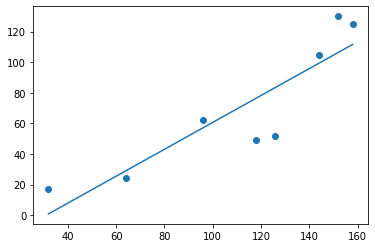

In [35]:
plt.scatter(X, Y)
plt.plot(X, slope*np.array(X) + intercept)
plt.show()

### 회귀 모형과 예측

In [39]:
from scipy import stats

In [43]:
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)

In [46]:
slope, intercept, r_value, p_value, std_err

(0.8796266379465087,
 -27.3584634715491,
 0.89008928103186,
 0.003051790677096642,
 0.18388671751663876)

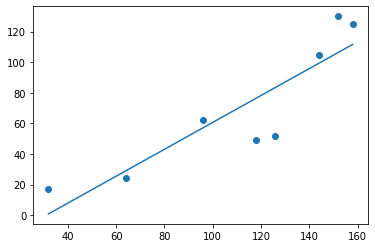

In [44]:
plt.scatter(X, Y)
plt.plot(X, slope*np.array(X) + intercept)
plt.show()

polyfit(x, y, deg): <br>
다항 회귀식을 계산(deg: 차수)

In [57]:
def draw_polyfit(X, Y, deg=1):
    fit = np.polyfit(X, Y, deg)
    fit_fn = np.poly1d(fit)
    sample_X = np.linspace(min(X), max(X), 100)
    plt.scatter(X, Y)
    plt.plot(sample_X, fit_fn(sample_X))
    plt.show()

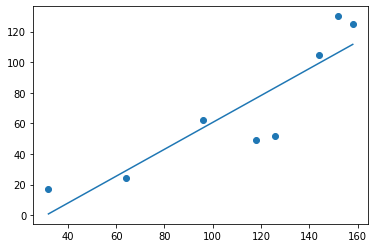

In [58]:
draw_polyfit(X, Y, 1)

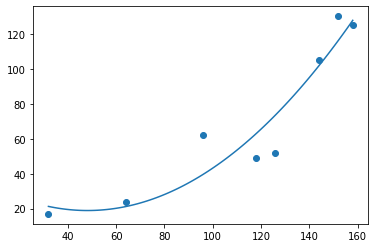

In [59]:
draw_polyfit(X, Y, 2)

### OLS 클래스와 포뮬러를 이용한 회귀식

In [61]:
X, Y

([32, 64, 96, 118, 126, 144, 152, 158], [17, 24, 62, 49, 52, 105, 130, 125])

In [60]:
df = pd.DataFrame(np.c_[X, Y], columns=["x", "y"])

포뮬러를 이용한 방정식으로 선형회귀식 구하기 <br>
(구하는 회귀식은 1차방정식(직선))

In [63]:
import statsmodels.api as sm
model = sm.OLS.from_formula("y ~ x", data=df)
result = model.fit()
result.params

Intercept   -27.358463
x             0.879627
dtype: float64

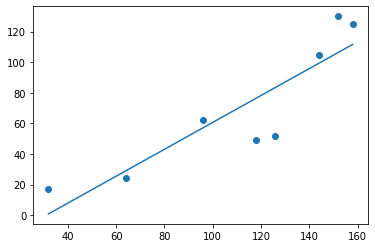

In [66]:
plt.scatter(df.x, df.y)
plt.plot(df.x, result.predict(df.x))
plt.show()

상수항을 포함하지 않는 3차방정식으로 선형회귀식 구하기

In [64]:
model2 = sm.OLS.from_formula("y~x + I(x**2) + I(x**3) -1", data=df)
result2 = model2.fit()
result2.params

x            1.005637
I(x ** 2)   -0.013981
I(x ** 3)    0.000082
dtype: float64

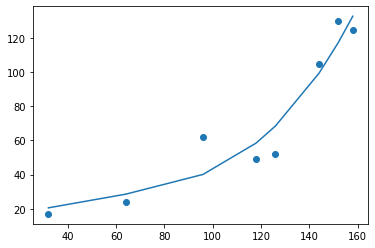

In [65]:
# 이 모형을 통해 y를 예측하고 그래프 그리기(곡선)
x_df = pd.DataFrame(data=X, columns=['x'])
y_ = result2.predict(x_df)

plt.scatter(X, Y)
plt.plot(X, y_)
plt.show()

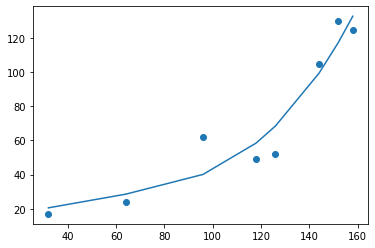

In [67]:
plt.scatter(df.x, df.y)
plt.plot(df.x, result2.predict(df.x))
plt.show()

# 실습
코로나19 일변 확진자(최근 1개월) 데이터를 이용해서 회귀모형을 작성하세요

In [194]:
Y = [12,18,34,35,27,26,29,27,19,13,15,13,32,12,20,23,25,16,19,40,79,58,39,27,35,38,49,39,39,51,57,38]

In [195]:
X = np.arange(len(Y))

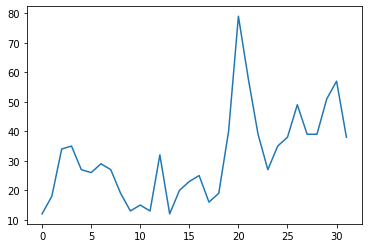

In [196]:
plt.plot(X, Y)
plt.show()

In [197]:
df = pd.DataFrame(np.c_[X,Y], columns=["x", "y"])

In [198]:
model = sm.OLS.from_formula("y~x+I(x**2)+I(x**3)+I(x**4)+I(x**5)+I(x**6)-1", data=df)
result = model.fit()
# result = model.fit_regularized(L1_wt=1, alpha=0.01) # 정규화
#result.params

In [199]:
sample_X = np.linspace(min(X), max(X), 100)
x_df = pd.DataFrame(sample_X, columns=['x'])

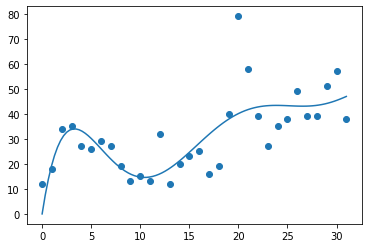

In [200]:
plt.scatter(X, Y)
plt.plot(sample_X, result.predict(x_df))
plt.show()

## 정규화 선형회귀

선형회귀 계수(Weight)에 대한 제약 조건을 추가하여, 모형이 과도하게 최적화 되는 현상(과적합, Overfitting)을 막는 방법

In [215]:
# sample data 만드는 함수
def make_nonlinear_data(seed=0):
    np.random.seed(seed)
    n_samples = 30
    X = np.sort(np.random.rand(n_samples))
    y = np.sin(2*np.pi*X) + np.random.randn(n_samples)*0.1
    X = X[:, np.newaxis]
    
    return X, y

In [216]:
X, y = make_nonlinear_data()

### Statsmodels의 정규화 회귀 모형

In [217]:
def plot_statsmodels(result):
    plt.scatter(X, y) # X, y 선언이 함수 밖에 되어 있음. 주의
    x = np.linspace(0, 1, 1000)
    x_df = pd.DataFrame(x, columns=["x"])
    x_df = sm.add_constant(x_df)
    plt.plot(x, result.predict(x_df).values)
    plt.show()

In [218]:
result

In [219]:
df = pd.DataFrame(np.c_[X,y], columns=["x", "y"])

In [220]:
def draw_model(df, wt):
    model = sm.OLS.from_formula("y~x+I(x**2)+I(x**3)+I(x**4)+I(x**5)+I(x**6)+I(x**7)+I(x**8)+I(x**9)-1", data=df)
    result = model.fit_regularized(L1_wt=wt, alpha=0.01) # 정규화
    plot_statsmodels(result)

Lasso 회귀모형

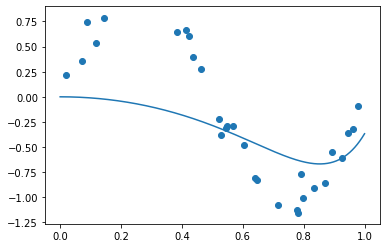

In [221]:
draw_model(df, 1)

Ridge 회귀모형

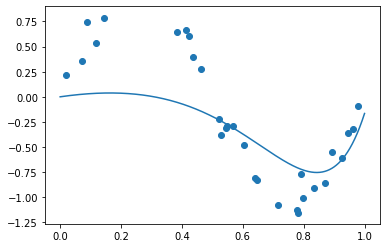

In [222]:
draw_model(df, 0)

Elastic Net 회귀모형

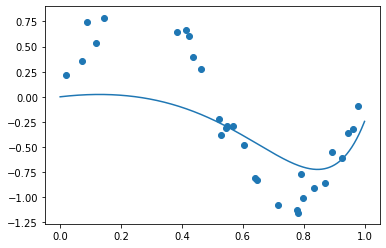

In [223]:
draw_model(df, 0.5)

### Scikit-Learn의 정규화 회귀 모형

In [225]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

In [229]:
# 모형을 이용해 산점도와 회귀선을 그림
def plot_model(model):
    plt.scatter(X, y)
    x = np.linspace(0, 1, 1000)
    plt.plot(x, model.predict(x[:, np.newaxis]))
    plt.show()

In [231]:
X, y = make_nonlinear_data()
dfX = pd.DataFrame(X, columns=["x"])
dfX = sm.add_constant(dfX)
dfy = pd.DataFrame(y, columns=['y'])
df = pd.concat([dfX, dfy], axis=1)

LinearRegression 회귀 모형

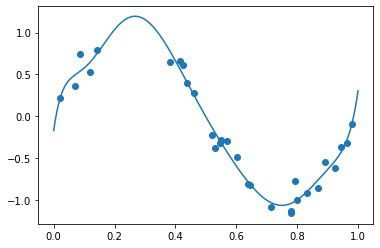

In [238]:
poly = PolynomialFeatures(9)
model = make_pipeline(poly, LinearRegression())
model = model.fit(X, y)
plot_model(model)

In [239]:
model.steps[1][1].coef_

array([ 0.00000000e+00,  2.57357731e+01, -4.28141683e+02,  3.86672311e+03,
       -1.83409397e+04,  4.93260725e+04, -7.88847431e+04,  7.45386451e+04,
       -3.84531322e+04,  8.35025499e+03])

Ridge 회귀모형

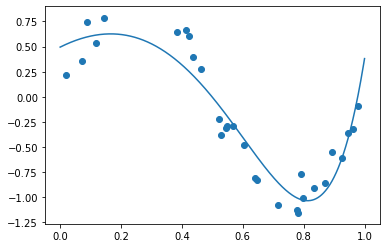

In [241]:
from sklearn.linear_model import Ridge
model = make_pipeline(poly, Ridge(alpha=0.01)).fit(X, y)
plot_model(model)

In [242]:
model.steps[1][1].coef_

array([ 0.        ,  1.51430399, -3.90160797, -2.6359859 , -0.41526792,
        1.07530175,  1.64913273,  1.52026782,  0.94651401,  0.13299614])

Lasso 회귀모형

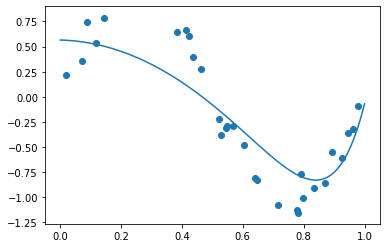

In [243]:
from sklearn.linear_model import Lasso
model = make_pipeline(poly, Lasso(alpha=0.01)).fit(X, y)
plot_model(model)

In [244]:
model.steps[1][1].coef_

array([ 0.        , -0.07668852, -2.44096313, -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.88188725])

ElasticNet 회귀모형

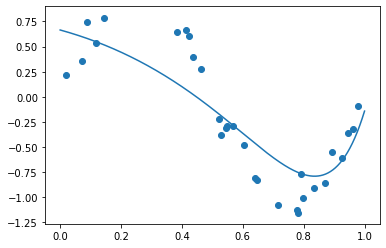

In [245]:
from sklearn.linear_model import ElasticNet
model = make_pipeline(poly, ElasticNet(alpha=0.01, l1_ratio=0.5)).fit(X, y)
plot_model(model)

In [246]:
model.steps[1][1].coef_

array([ 0.        , -0.83768018, -1.23944649, -0.50166684, -0.        ,
        0.        ,  0.        ,  0.30382246,  0.62459231,  0.84262899])

Ridge 모형과 Lasso 모형의 차이

Ridge: 가중치 계수를 모두 한꺼번에 축소시킴 <br>
Lasso: 일부 가중치 계수가 다른 가중치 계수에 비해 먼저 0으로 수렴 <br>

In [247]:
# 당뇨병 데이터셋
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

Ridge

In [248]:
alpha = np.logspace(-3, 1, 5)
data = []
for i, a in enumerate(alpha):
    ridge = Ridge(alpha=a).fit(X, y)
    data.append(pd.Series(np.hstack([ridge.intercept_, ridge.coef_])))

df_ridge = pd.DataFrame(data, index=alpha).T

In [249]:
df_ridge

,0.001,0.010,0.100,1.000,10.000
0,152.133484,152.133484,152.133484,152.133484,152.133484
1,-9.551414,-7.199457,1.307349,29.465746,19.812822
2,-239.090354,-234.552930,-207.194814,-83.154885,-0.918458
3,520.363367,520.583136,489.691080,306.351627,75.416167
4,323.828627,320.523356,301.769437,201.629434,55.025419
5,-712.328205,-380.607066,-83.466074,5.909369,19.924600
6,413.383794,150.483752,-70.828096,-29.515927,13.948686
7,65.811629,-78.591232,-188.680164,-152.040465,-47.553816
8,167.513774,130.313059,115.712703,117.311715,48.259420
9,720.944468,592.349587,443.814054,262.944995,70.144068


Lasso

In [254]:
alpha = np.logspace(-3, 1, 5)
data = []
for i, a in enumerate(alpha):
    lasso = Lasso(alpha=a).fit(X, y)
    data.append(pd.Series(np.hstack([lasso.intercept_, lasso.coef_])))

df_lasso = pd.DataFrame(data, index=alpha).T

In [255]:
df_lasso

,0.001,0.010,0.100,1.000,10.000
0,152.133484,152.133484,152.133484,152.133484,152.133484
1,-8.998449,-1.306575,-0.000000,0.000000,0.000000
2,-238.899740,-228.822331,-155.362882,-0.000000,0.000000
3,520.261362,525.560658,517.182017,367.701852,0.000000
4,323.429484,316.175320,275.082351,6.301904,0.000000
5,-720.251734,-307.013677,-52.540269,0.000000,0.000000
6,421.405141,89.321688,-0.000000,0.000000,0.000000
7,66.734168,-105.081398,-210.159753,-0.000000,-0.000000
8,164.448873,119.597989,0.000000,0.000000,0.000000
9,725.340440,571.330871,483.914409,307.605700,0.000000


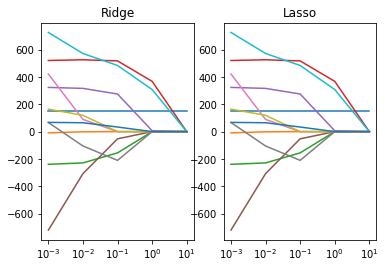

In [256]:
ax1 = plt.subplot(121)
plt.semilogx(df_ridge.T)
plt.xticks(alpha, label=np.log10(alpha))
plt.title("Ridge")

ax2 = plt.subplot(122)
plt.semilogx(df_lasso.T)
plt.xticks(alpha, label=np.log10(alpha))
plt.title("Lasso")
plt.show()

# 다중 회귀 분석

단순 회귀분석의 확장판. 선형 모형을 기초로 독립변수가 2개 이상일 때 사용

In [257]:
# 보스턴 집값 데이터 활용
from sklearn.datasets import load_boston
boston = load_boston()
X = boston.data
y = boston.target

In [259]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

회귀 모형 만들기 <br>

In [260]:
from sklearn.linear_model import LinearRegression
model_boston = LinearRegression()
model_boston.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

평가

평가 방법
    - 모형의 score() 함수 이용
    - cross_val_score() 함수와 scoring 속성 이용
    - metrics 함수 이용

In [262]:
# score() 함수 이용
model_boston.score(X_train, y_train)

0.7416017321129614

In [263]:
# cross_val_score() 함수
# scoring 속성을 포함하지 않으면 회귀 모델의 경우 결졍계수를 출력
from sklearn.model_selection import cross_val_score
r2 = cross_val_score(model_boston, X_train, y_train, cv=5)
r2

array([0.82864009, 0.74931394, 0.64871076, 0.73370718, 0.4340181 ])

In [265]:
r2.mean()

0.6788780152636475

In [266]:
# metrics 함수 이용
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, model_boston.predict(X_train)))

4.525170942694391

예측

In [268]:
y_pred = model_boston.predict(X_test)
y_pred

array([37.63838279, 15.15984507, 35.08833614,  4.15758253, 21.72008077,
       15.63048327, 27.21973583, 20.76522292, 21.77771814, 22.77944556,
       18.15992635, 24.94340651, 25.27387767, 21.6032496 , 23.84611918,
       22.4814894 ,  7.07844655, 23.99516093, 21.60172462, 20.34131719,
       20.83726991, 17.17886054, 13.44384803, 42.99240896, 19.95560594,
        9.06694701, 10.04093376, 20.19133962, 22.65169754, 24.95145316,
       10.26621447, 31.40439409, 21.87850786, 19.35786459, 13.18187397,
       36.96408179, 17.73543692, 12.71527386, 28.11203825, 23.1075738 ,
       18.80219067, 24.24741836, 18.32640576, 21.20957179, 24.97538315,
       39.08061569, 17.01198857, 31.83703724,  7.976627  , 19.23792636,
       16.04867515, 18.79264931, 14.20936752, 30.43033517,  8.11163704,
       28.45984587, 32.2726972 , 18.33104838,  7.49970266, 23.06536967,
       20.12901858,  6.08764785, 20.18073404, 22.97292619, 19.11428321,
       23.42053714, 35.92566678, 31.44406788, 14.75952845, 16.10

검증 데이터셋을 이용한 평가

In [269]:
rmse_test = math.sqrt(mean_squared_error(y_test, y_pred))
rmse_test

5.3096422712558615

In [270]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7077182623553149

다중회귀식의 추정

In [271]:
import statsmodels.api as sm
Boston = sm.datasets.get_rdataset("Boston", package="MASS")
boston_df = Boston.data
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [275]:
# 모형 생성, 요약정보 출력
import statsmodels.formula.api as smf
formula = "medv~" + "+".join(boston_df.iloc[:, :-1].columns)
model_boston = smf.ols(formula=formula, data=boston_df).fit()

In [276]:
model_boston.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          6.72e-135
Time:                        15:42:56   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
zn             0.0464      0.014      3.382      0.001       0.019       0.073
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
chas           2.6867      0.862      3.118      0.002       0.994       4.380
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
rm             3.8099      0.418      9.116      0.000       2.989       4.631
age            0.0007      0.013      0.052      0.958      -0.025       0.027
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
rad            0.3060      0.066      4.613      0.000       0.176       0.436
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
black          0.0093      0.003      3.467      0.001       0.004       0.015
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [277]:
formula = "medv~rad+zn+rm+chas+age-1" # 일부 변수만 사용
model_boston2 = smf.ols(formula=formula, data=boston_df).fit()

In [279]:
model_boston2.summary()
# Adj.R-squared(수정된 결정계수): 다중회귀분석에서 나오는 개념
# 독립변수의 수가 늘어날수록 결정계수가 높아지는 단점이 있어, 이를 보완하기 위해 도입
# -> 다중회귀분석에서는 결정계수 대신 수정된 결정계수를 사용해야 함

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   medv   R-squared (uncentered):                   0.932
Model:                            OLS   Adj. R-squared (uncentered):              0.931
Method:                 Least Squares   F-statistic:                              1363.
Date:                Mon, 08 Jun 2020   Prob (F-statistic):                   5.05e-289
Time:                        16:23:37   Log-Likelihood:                         -1654.6
No. Observations:                 506   AIC:                                      3319.
Df Residuals:                     501   BIC:                                      3340.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
rad           -0.2183      0.037     -5.924      0.000      -0.291      -0.146
zn             0.0161      0.015      1.056      0.291      -0.014       0.046
rm             4.7232      0.147     32.166      0.000       4.435       5.012
chas           5.6944      1.128      5.047      0.000       3.478       7.911
age           -0.0792      0.012     -6.358      0.000      -0.104      -0.055
==============================================================================
Omnibus:                      234.375   Durbin-Watson:                   0.708
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1253.471
Skew:                           2.008   Prob(JB):                    6.49e-273
Kurtosis:                       9.583   Cond. No.                         299.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 다중공선성

독립변수가 여러개일 때, 그 변수들 끼리 상관관계가 높을 경우(대체로 90% 이상) '다중공선성(Multicollinearity)가 존재한다' 고 표현 <br>
다중공선성을 제거하지 않고 분석하면 잘못된 결과가 도출될 수 있음
    * example
    회귀 모형의 적합성이 떨어짐
    다른 중요한 독립변수가 모형에서 제거될 가능성이 높음
    결정계수의 값이 과대하게 나타남
    설명력은 좋은데 예측력이 떨어짐

### 분산 확대 인자/분산 팽창 계수(VIF; Variance Inflation Factor)
상관관계가 90% 이상일 때 외에 VIF 가 10 이상일 경우에도 다중공선성이 있다고 판단 <br>
<i> VIF = 1/(1-R^2) </i>

### 공차한계
어떤 독립변수가 다른 독립변수들에 의해서 설명되지 않는 부분. 0.10 이하일 경우 공선성이 존재한다고 평가 <br>
변수 i의 공차한계 = <i> 1-(R_i)^2 </i>

물론, 절대적인 기준은 없으므로 적절한 기준에서의 판단이 필요

다중공선성이 의심되면 아래의 상황을 원인으로 의심해 볼 수 있음
1. Data 수에 비해 과다한 독립변수를 사용했을 때 (ex.8000개의 데이터, 300개의 열)
2. 독립변수들의 상관관계가 크게 나타날 때
3. 한 독립변수의 회귀모형에 추가하거나 제거하는 것이 회귀계수의 크기나 부호에 큰 변화를 줄 때
4. 새로운 Data를 추가하거나 기존의 Data를 제거하는 것이 회귀계쑤의 크기나 부호에 큰 변화를 줄 때
5. 중요하다고 생각되어지는 독립변수에 대한 P값이 크게 나타나 통계적 차이가 없을 때<br>
(회귀계수의 부호가 과거의 경험이나 이론적인 면에서 기대되는 부호와 정반대일 때)

해결방법
- 상관관계가 높은 독립변수를 제거하거나 변수 선택방법을 이용해서 분석
- VIF가 10보다 큰 값이 있다면 VIF값이 가장 큰 변수를 제거

In [280]:
# sample data
Boston = sm.datasets.get_rdataset("Boston", package="MASS")
boston_df = Boston.data

In [286]:
def get_vif(formula, df):
    # 독립변수, 종속변수 나눔 (독립변수에 상수항이 추가되도록 이 방법을 선택)
    from patsy import dmatrices
    y, X = dmatrices(formula, boston_df, return_type="dataframe")
    
    vif = pd.DataFrame()
    
    # VIF 계산
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    vif["VIF Factor"] = [variance_inflation_factor(X.values, i)
                         for i in range(X.shape[1])]
    vif["features"] = X.columns
    vif.sort_values(by="VIF Factor", ascending=False)
    return vif

In [287]:
formula = "medv~" + "+".join(boston_df.columns[:-1])
get_vif(formula, boston_df)

,VIF Factor,features
0,585.265238,Intercept
1,1.792192,crim
2,2.298758,zn
3,3.991596,indus
4,1.073995,chas
5,4.393720,nox
6,1.933744,rm
7,3.100826,age
8,3.955945,dis
9,7.484496,rad


# 상관계수, 결정계수

* 상관계수(R; correlation coefficient): 상관분석에서 상관관계의 정도를 나타내는 계수 
* 결정계수(R2; coefficient of determination, R-squared): 상관계수를 제곱한 것. 회귀식이 자료를 얼마나 잘 설명하고 있는지, 즉 독립변수가 종속변수를 얼마나 잘 설명하고 있는지를 나타낸 계수

* 결정계수 
    - 0 < R2 < 1 사이의 값을 가짐
    - 일반적으로 0.65(65%) 이상에서 데이터를 잘 설명한다고 판단
    - 단, 결정계수가 조금 낮더라도 연구자가 낮은 결정계수의 이유에 대해 충분히 입증할 수 있으면 회귀식을 설명하기에 충분할 수 있음

## 잔차의 독립성
자기상관(Autocorrelation): 잔차가 다른 잔차에 영향을 미치게 되는 경우. 앞의 잔차항이 뒤의 잔차항에 영향을 미치는 경우로, 시계열 데이터에서 많이 관찰됨 <br>
자기상관이 높으면 분석의 신뢰성을 잃게됨 <br><br>

회귀모형에서 자기상관이 발생하면, 회귀모형의 기본가정인 '잔차항들은 서로 독립이다' 라는 가정을 위배하게 됨. <br>
이를 무시하고 회귀모형을 적용하면 일반적으로 회귀계수에 대한 검정 통계량 t값과 회귀모형에 대한 검정통계량 F값, R2의 값을 실제보다 증가시키는 경향이 있음 <br><br>

잔차의 독립성은 Durbin-Watson(더빈-왓슨)값으로 판단
    - 0에 가까울 수록 양의 자기상관
    - 4에 가까울 수록 음의 자기상관
    - 2에 가까울 수록 자기상관이 없다고 판단
    - 보통 1.5 ~ 2.5  사이의 값을 적용
    - 오차항에 자기상관이 있는지 없는지를 판단하기 위해 사용

## 잔차의 정규성

데이터의 요약정보가 아닌 그래프를 보고 판단

In [288]:
# 집값 예측
y_pred = model_boston2.predict(boston_df)

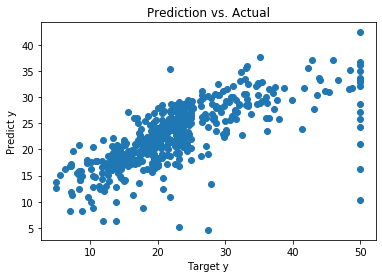

In [290]:
fig = plt.figure()
plt.scatter(boston_df.iloc[:,-1], y_pred)
plt.xlabel("Target y")
plt.ylabel("Predict y")
plt.title("Prediction vs. Actual")
plt.show()

In [ ]:
# y_pred(예측한 집값 데이터)를 이용해서 그래프를 그림
# 이 그래프를 정규 P-P 도표라고 부름: 